## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data1=pd.read_csv("C://Users//Vijayalakshmi//Desktop//DataScience_Programs_August//Analysis//Netflix//NetflixOriginals.csv//NetflixOriginals.csv", encoding='ISO-8859-1', skiprows=6)
data1.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [44]:
data1.shape

(584, 8)

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [49]:
data1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,584,584,Enter the Anime,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genre,584,102,documentary,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Premiere,584,390,"October 2, 2020",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Runtime,584.0,NaN,NaN,NaN,93.577055,27.761683,4.0,86.0,97.0,108.0,209.0
IMDB_Score,584.0,NaN,NaN,NaN,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0
Language,584,37,English,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,584.0,NaN,NaN,NaN,2018.936644,1.473992,2014.0,2018.0,2019.0,2020.0,2021.0
Month,584,12,October,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data1[data1.duplicated()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language


In [39]:
data1['Runtime'].min()

4

In [41]:
data1['Runtime'].max()

209

In [6]:
data1['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [50]:
data1['Language'].unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'English/Korean', 'English/Arabic', 'English/Russian',
       'English/Akan', 'English/Ukranian/Russian'], dtype=object)

In [8]:
data1.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [9]:
data1.columns = data1.columns.str.replace(' ', '_')

In [10]:
data1.head()

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [11]:
data1['Year']=pd.to_numeric(data1['Premiere'].str.split().str.get(2))
data1['Month']=data1['Premiere'].str.split(',').str.get(0).str.split(' ').str.get(0)

In [12]:
data1['Language'].replace({'Spanish/English':'English/Spanish'},inplace=True)

In [13]:
data1['Genre']=data1['Genre'].str.lower().str.replace('-',' ')

In [14]:

replace_dict={'science fiction':'science-fiction',
              'black comedy':'black-comedy',
              'coming of age comedy drama':'coming-of-age comedy drama',
              'concert film': 'concert-film',
              'making of' :'making-of',
              'one man show': 'one-man-show',
              'stop motion': 'stop-motion',
              'variety show' :'variety-show',
              'romantic drama':'romance drama',
              'romantic teenage drama': 'romantic teen drama'}
data1['Genre'] = data1['Genre'].replace(replace_dict,regex=True)

In [15]:
data1['Genre']=data1['Genre'].str.replace('/', ' ').str.lower().str.replace('   ',' ').str.lower().str.replace(' ',' / ')

In [16]:
def merge_dup_genre(genre):
    split_genre = genre.split(' / ')
    split_genre.sort()  
    return(' / '.join(split_genre))

In [17]:
data1['Genre']=data1['Genre'].apply(merge_dup_genre)

In [18]:
data1['Genre']=data1['Genre'].str.replace('family','family / film')

In [19]:
data1['Genre']=data1['Genre'].str.replace('film / film','film')

In [20]:
data1['Genre']=data1['Genre'].str.replace('christmas / family / film / musical','christmas / family / musical')
data1['Genre']=data1['Genre'].str.replace('comedy / family / film / fantasy','comedy / family / fantasy')
data1['Genre']=data1['Genre'].str.replace('comedy / drama / family / film','comedy / drama / family')

data1['Genre']=data1['Genre'].str.replace('film / heist / thriller','heist / thriller / film')
data1['Genre']=data1['Genre'].str.replace('film / sports','sports / film')
data1['Genre']=data1['Genre'].str.replace('comedy / dark','dark-comedy')

## Visualization

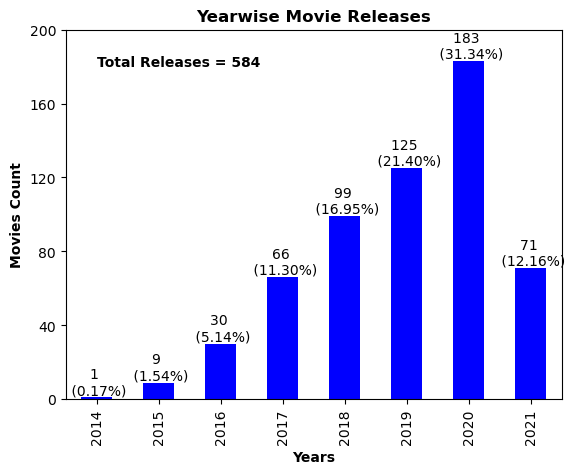

In [21]:
cnts = data1['Year'].value_counts().sort_index()
cnts.plot(kind='bar' ,color='b')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Movies Count',fontweight = 'bold')
plt.title('Yearwise Movie Releases',fontweight = 'bold')
plt.yticks([0,40, 80, 120, 160,200])  
plt.text(0,180,f'Total Releases = {cnts.sum()}',fontweight = 'bold')
for i, (year, count) in enumerate(cnts.items()):
    percentage = (count / cnts.sum()) * 100
    plt.text(i, count, f"{count} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.show()


1. The given 584 counts of data lies between the years of 2014 to 2021, which are about 8 years.
2. In that, 183 movies, that is 31 % of movies released in 2020 only. Potentially, everybody was shortened due to Corono(Pandemic) in 2020, and we needed a some form of entertainment as people had more and more time, we can decide to make more movies. After the lock down , people tend to watch movies more on theatre and decreased and movies count fell down to 12 % in 2021.

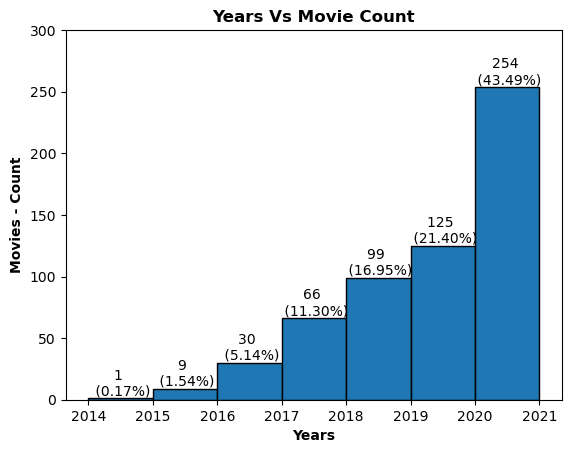

In [22]:
bulk_bins = [2014,2015,2016,2017,2018,2019,2020,2021]
hist, bin_edges = np.histogram(data1['Year'], bins=bulk_bins)
plt.hist(data1['Year'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['Year'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Movies - Count',fontweight = 'bold')
plt.yticks([0,50,100,150,200,250,300],['0','50','100','150','200','250','300'])
plt.title('Years Vs Movie Count',fontweight = 'bold')
plt.show()

2.1. This histogram shows the movie count is stepping up to 5 % every year except 2020-2021. From 2014, Netflix used its logo for streaming 
and people gets started to use. Hence,  very low count of movies released in 2014-2017. 
Then, Slowly increased its movies count and peaked in 2020-2021. 


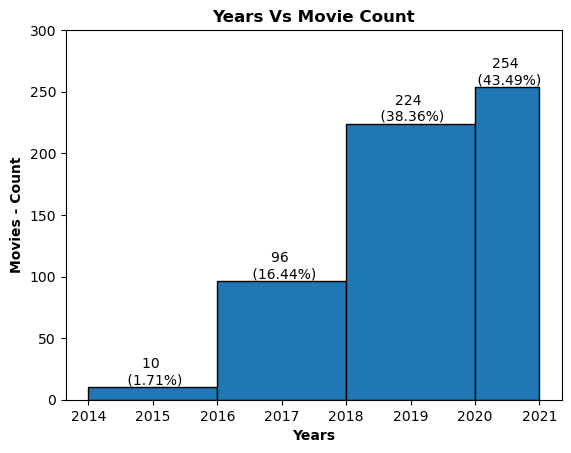

In [23]:
bulk_bins = [2014,2016,2018,2020,2021]
hist, bin_edges = np.histogram(data1['Year'], bins=bulk_bins)
plt.hist(data1['Year'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['Year'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('Years',fontweight = 'bold')
plt.ylabel('Movies - Count',fontweight = 'bold')
plt.yticks([0,50,100,150,200,250,300],['0','50','100','150','200','250','300'])
plt.title('Years Vs Movie Count',fontweight = 'bold')
plt.show()

3. 18.15 % of movies are released in 2014 - 2018 
4. 38.36 % of movies have been realeased within 2018 to 2020 years
5. 43.49% movies are released in 2020 - 2021. The count has been increased dramatically in 2020-2021. people tend to watch movies in theare than they used before. 

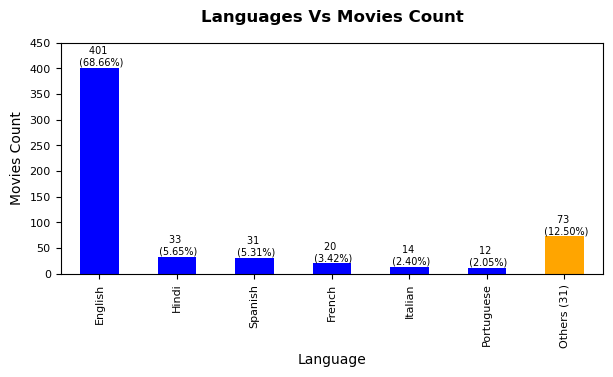

In [24]:
fig,axarr=plt.subplots(1, 1, figsize=(7, 3))
df=data1['Language'].value_counts().head(6)
df['Others (31)']=73
data_count=len(data1['Language'])
bars=df.plot.bar(ax=axarr, fontsize=8,color='b')
bars.patches[-1].set_facecolor('orange')
axarr.set_xlabel('Language')
axarr.set_ylabel('Movies Count')
axarr.set_yticks([0,50,100,150,200,250,300,350,400,450])
axarr.set_yticklabels(['0','50','100','150','200','250','300','350','400','450'])
axarr.set_title("Languages Vs Movies Count", fontsize=12 ,fontweight='bold',pad=15)
for i, p in enumerate(list(df)):
        percentage=(p/data_count)*100
        plt.text(i, p, f"{p} \n ({percentage:.2f}%)", fontsize=7,ha='center', va='bottom')
plt.show()

6. 68.6% movies are only in English Language. 
     Netflix being an American Company which is also from English speaking country, potentially beacause of this fact, Netflix is predominantly releasing more movies in English. But, Netflix is used by people all over the world. If we want to put hold on other countries or other languages we need to give more importance to local languages of that country. For example : more movies and series in Hindi,Tamil,Telugu,malayalam will attract the people of Indian territories. 


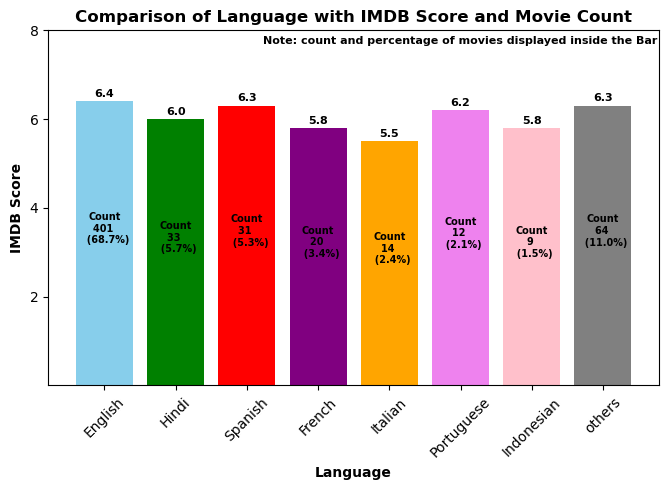

In [25]:
plt.subplots(1, 1, figsize=(7, 5))
Total_Data_Count=data1["Title"].count()
grouped_data = data1.groupby('Language').agg({'IMDB_Score': 'mean', 'Title': 'count'})
grouped_data=grouped_data.sort_values(by='Title',ascending=False)
grouped_data['IMDB_Score']=grouped_data['IMDB_Score'].apply(lambda x : round(x,1))
df1=grouped_data[:7]
grouped_data['Percentage'] = (grouped_data['Title'] / grouped_data['Title'].sum()) * 100
grouped_data['Percentage']=grouped_data['Percentage'].apply(lambda x : round(x,1))
df2=grouped_data[7:]
AvgTitle=df2['Title'].sum()
AvgImdbScore=df2['IMDB_Score'].mean().__round__(1)
new_row = {'IMDB_Score': AvgImdbScore, 'Title': AvgTitle}
df1.loc['others'] = new_row
df1
colors = ['skyblue', 'green', 'red', 'purple', 'orange','violet','pink','grey']
plt.bar(df1.index, df1['IMDB_Score'], color=colors)
plt.xlabel('Language',fontweight='bold')
plt.ylabel('IMDB Score',fontweight='bold')
plt.xticks(rotation=45) 
plt.yticks([2,4,6,8],['2','4','6','8']) 
plt.text(5, 7.7, 'Note: count and percentage of movies displayed inside the Bar' ,fontweight='bold', ha='center', fontsize=8, color='k')
for i, each_lang_count in enumerate(df1['Title']):
    percentage=(each_lang_count/Total_Data_Count)*100
    plt.text(i, df1['IMDB_Score'][i] / 2, f'Count\n{each_lang_count} \n  ({percentage:.1f}%)', ha='center',fontweight='bold', fontsize=7, color='k')
for j, score in enumerate(df1['IMDB_Score']):
    plt.text(j, df1['IMDB_Score'][j] +0.1, f'{score}' , ha='center', fontsize=8,fontweight='bold', color='k')
plt.title('Comparison of Language with IMDB Score and Movie Count',fontweight='bold')
plt.tight_layout()
plt.show()

6.1.English Movies are topped in total count and also topped in IMDB Score - 6.4

6.2.Hindi,the second highest and popular language, has the average IMDB score of 6.0 which is a very decent rating 
eventhough 33 movies only released.
     As India is the highest populated country and Hindi movies,series will be entertained most of the people. If the 
     movies count are increased, more people will use of it. 

6.3. Spanish movies are third highest count of 31 has very good rating as 6.3. It can be increased as it shows excellent figures.

6.4. Italin and Indonesian are the languages having very less count of movies and scores below 6 , showing less interest among the people.

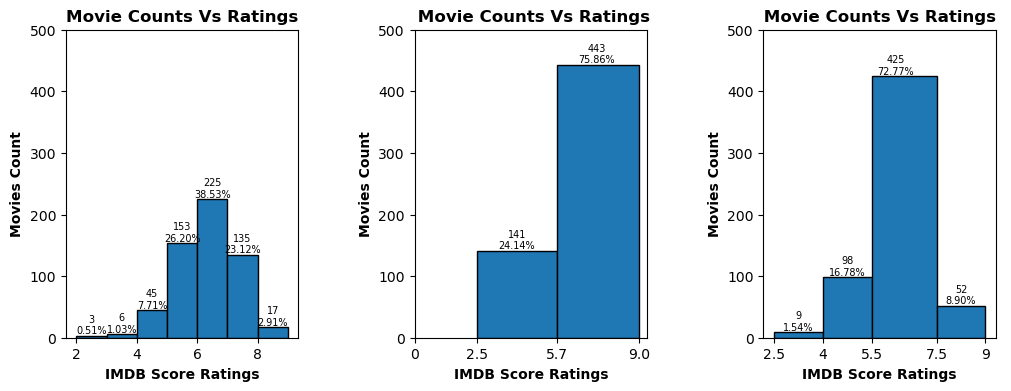

In [26]:
fig, axarr = plt.subplots(1, 3, figsize=(12, 4))
tot=len(data1['IMDB_Score'])
df1=data1.query("IMDB_Score >=2.5 & IMDB_Score <=9.0")
bulk_bins = [2,3,4,5,6,7,8,9]
counts, bins,_ =axarr[0].hist(df1['IMDB_Score'], bins=bulk_bins, edgecolor='k')
axarr[0].set_xlabel('IMDB Score Ratings',fontweight = 'bold')
axarr[0].set_ylabel('Movies Count',fontweight = 'bold')
axarr[0].set_yticks([0,100,200,300,400,500],['0','100','200','300','400','500'])
axarr[0].set_title('Movie Counts Vs Ratings',fontweight = 'bold')
for bin_count, x in zip(counts, bins):
    percentage = f'{100 * bin_count / tot:.2f}%'
    axarr[0].annotate(f'{int(bin_count)}\n{percentage}', (x + (bulk_bins[1] - bulk_bins[0]) / 2, bin_count), fontsize=7, ha='center', va='bottom')
bulk_bins1 = [2.5,5.7,9.0]
counts1, bins1,_ = axarr[1].hist(df1['IMDB_Score'], bins=bulk_bins1, edgecolor='k')
axarr[1].set_xlabel('IMDB Score Ratings' ,fontweight = 'bold')
axarr[1].set_ylabel('Movies Count',fontweight = 'bold')
axarr[1].set_xticks([0,2.5,5.7,9],['0','2.5','5.7','9.0'])
axarr[1].set_yticks([0,100,200,300,400,500],['0','100','200','300','400','500'])
axarr[1].set_title(' Movie Counts Vs Ratings' ,fontweight = 'bold')
for bin_count, x in zip(counts1, bins1):
    percentage = f'{100 * bin_count / tot:.2f}%'
    axarr[1].annotate(f'{int(bin_count)}\n{percentage}', (x + (bulk_bins1[1] - bulk_bins1[0]) / 2, bin_count), fontsize=7, ha='center', va='bottom')
bulk_bins2 = [2.5,4,5.5,7.5,9]
counts2, bins2,_ = axarr[2].hist(df1['IMDB_Score'], bins=bulk_bins2, edgecolor='k')
axarr[2].set_xlabel('IMDB Score Ratings' ,fontweight = 'bold')
axarr[2].set_ylabel('Movies Count',fontweight = 'bold')
axarr[2].set_xticks([2.5,4,5.5,7.5,9],['2.5','4','5.5','7.5','9'])
axarr[2].set_yticks([0,100,200,300,400,500],['0','100','200','300','400','500'])
axarr[2].set_title(' Movie Counts Vs Ratings ' ,fontweight = 'bold')
for bin_count, x in zip(counts2, bins2):
    percentage = f'{100 * bin_count / tot:.2f}%'
    axarr[2].annotate(f'{int(bin_count)}\n{percentage}', (x + (bulk_bins2[1] - bulk_bins2[0]) / 2, bin_count), fontsize=7, ha='center', va='bottom')
plt.subplots_adjust(wspace=0.5)
plt.show()

7. 25% movies are having IMDB score range as 2.5 to 5.7
8. 75% of movies are having 5.7 to 9 IMDB score
9. In precise, 50 % are in the range of 5.7 to 7.0 and 26 % movies are 7.0 to 9.0 IMDB score.

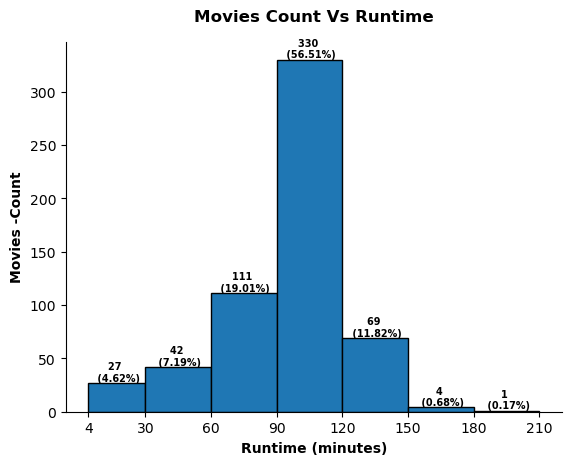

In [27]:
df1=data1.query("Runtime >=4.0 & Runtime <= 209")
bulk_bins = [4,30,60,90,120,150,180,210]
hist, bin_edges = np.histogram(df1['Runtime'],bins=bulk_bins)
plt.hist(df1['Runtime'], edgecolor='k',bins=bulk_bins)
plt.xticks([4,30,60,90,120,150,180,210],['4','30','60','90','120','150','180','210'])
plt.xlabel('Runtime (minutes)',fontweight = 'bold')
plt.ylabel('Movies -Count',fontweight = 'bold')
plt.title('Movies Count Vs Runtime',pad=15,fontweight = 'bold')
for i in range(len(hist)):
    percentage = (hist[i] / len(data1['Runtime'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", fontweight = 'bold',fontsize =7,ha='center', va='bottom',color='k')
sns.despine()
plt.show()

8. 25% movies are running with in the range of 4.0 minutes to 1 hr 26 minutes.
9. 50% movies runtime falls in the range of 1 hr 26 min to 1.hr 48 minutes
10. The shortest movie run time is 4.0 minute. It is, 'Sol Levante' , the English Anime / Short movie and 
   it scores 4.7 which is below average
11. The longest movie runtime is 3 hrs 29 min. It is 'The Irishman' English movie,Crime Drama  which 
    scores 7.8 

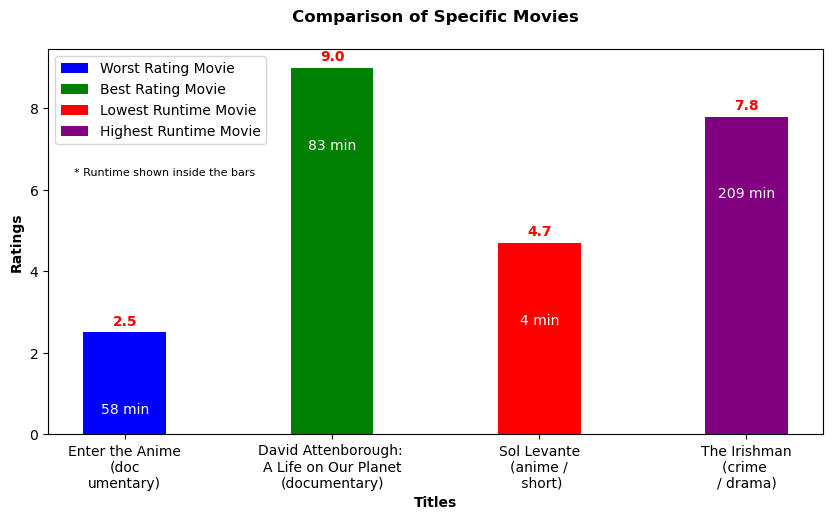

In [28]:
fig, axarr = plt.subplots(1, 1, figsize=(10, 5))
df1_imdb = data1.query('IMDB_Score == IMDB_Score.min() | IMDB_Score == IMDB_Score.max()')
df1_runtime = data1.query('Runtime == 4.0 | Runtime == 209')
df1 = pd.concat([df1_imdb, df1_runtime])
df1['new_title']=df1['Title'] +'\n'+'('+ df1['Genre']+')'
colors = ['blue', 'green', 'red', 'purple', 'orange']
bars=axarr.bar(df1['Title'], df1['IMDB_Score'],color=colors, width=0.4)
TitleList= [title[:20] + '\n' + title[20:] if len(title) > 20 else title for title in df1['new_title']]
bars.patches[0].set_label('Worst Rating Movie')
bars.patches[1].set_label('Best Rating Movie')
bars.patches[2].set_label('Lowest Runtime Movie')
bars.patches[3].set_label('Highest Runtime Movie')
axarr.set_xticks(range(len(df1)), TitleList,  ha="center")  
axarr.set_title('Comparison of Specific Movies' , pad=20,fontweight='bold')
axarr.legend(loc=2)
axarr.set_xlabel('Titles' ,fontweight='bold',ha='center')
axarr.set_ylabel('Ratings',fontweight='bold')
axarr.text(0.19,6.3, '* Runtime shown inside the bars' , fontsize=8,color = 'k', ha='center', va='bottom')
for i, v in enumerate(list(df1['IMDB_Score'])):    
    axarr.text(i,v+.1, str(v) , color = 'red', fontweight = 'bold',ha='center', va='bottom')
for bar, text_count in zip(bars, df1['Runtime']):
    axarr.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, str(text_count)+' min', ha='center', color='white')
plt.show()

12. The lowest scored (2.5) movie is 'Enter the Anime' -(English/Japanese) Documentary Genre runs for 58 min
13. The Highest scored(9.0) movie is 'David Attenborough: A Life on Our Planet', English-Documentary 
    run for 1 hr 23 min

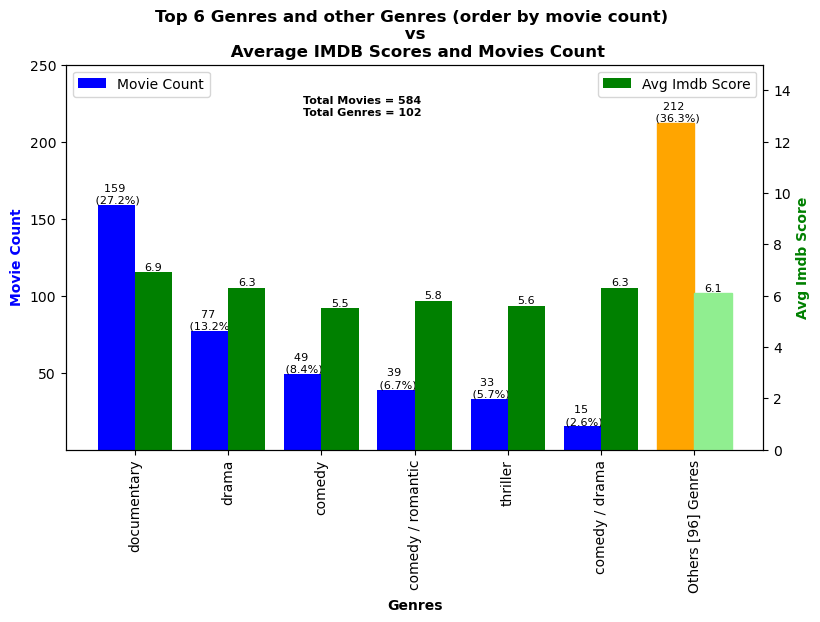

In [29]:
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_mean','mean')],'Runtime':[('_mean','mean')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df1['R__mean']= df1['R__mean'].apply(lambda x: round(x, 1))
df1_sorted = df1.sort_values(by='G__cnt', ascending=False)
df2=df1_sorted[:6]
df3=df1_sorted[6:]
Total_Others_Genres=df3['G__cnt'].sum()
Avg_rating=(df3['I__mean'].sum()/df3['Genre'].count()).round(1)
avg_runtime=(df3['R__mean'].sum()/df3['Genre'].count()).round(1)
new_row = {'Genre' : 'Others [96] Genres','G__cnt' : Total_Others_Genres, 'I__mean' : Avg_rating, 'R__mean': avg_runtime}
df2.loc['01'] = new_row
fig, ax1 = plt.subplots(1, 1, figsize=(9, 5))
bar_width = 0.40
x = np.arange(len(df2['Genre']))
ax2 = ax1.twinx()
bars1=ax1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', align='center',color="blue")
x = x + bar_width
bars2=ax2.bar(x, df2['I__mean'], bar_width, label='Avg Imdb Score', align='center',color="green")
bars1[6].set_color('orange')
bars2[6].set_color('lightgreen')
ax1.set_ylabel('Movie Count', color='blue', fontweight='bold')
ax2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
ax1.set_title("Top 6 Genres and other Genres (order by movie count) \n vs \n Average IMDB Scores and Movies Count",fontweight='bold')
ax1.set_xlabel("Genres",fontweight = 'bold')
ax1.set_xticks(x - bar_width / 2)
ax1.set_xticklabels(df2['Genre'])
ax1.tick_params(axis='x', rotation=90)
ax1.set_yticks([50, 100, 150,200,250])
ax2.set_ylim(0,15) 
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.text(2,13.5,f'Total Movies = {df1["G__cnt"].sum()}',fontweight = 'bold',fontsize=8)
plt.text(2,13,f'Total Genres = {df1["Genre"].count()}',fontweight = 'bold',fontsize=8)
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1} \n ({height1 / df1["G__cnt"].sum() * 100:.1f}%)',(bar1.get_x() + bar1.get_width() / 2, height1),                 
                ha='center', va='bottom', fontsize=8)
    ax2.annotate(f'{height2}', (bar2.get_x() + bar2.get_width() / 2, height2),
                ha='center', va='bottom', fontsize=8)
plt.show()

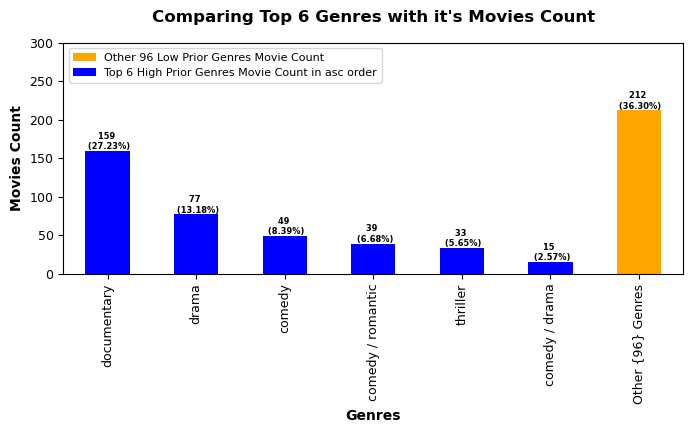

In [30]:
fig, axarr = plt.subplots(1, 1, figsize=(8, 3))
High_prior_genres=['documentary','drama','comedy','comedy / romantic','thriller','comedy / drama']
exclude_high_prior = data1[~data1['Genre'].isin(High_prior_genres)]
low_prior_genres=exclude_high_prior['Genre'].nunique()
total_genres=data1['Genre'].nunique()
data_count=data1['Genre'].shape[0]
low_prior_count=exclude_high_prior['Genre'].shape[0]
high_prior_count=data_count-low_prior_count
new_label= 'Other+f"{low_prior_genres} "+ Genres'
df=data1['Genre'].value_counts().head(6)
df['Other {96} Genres']=low_prior_count
bars=df.plot.bar(ax=axarr, fontsize=9,color='b',label='Top 6 High Prior Genres Movie Count in asc order')
bars.patches[-1].set_facecolor('orange')
bars.patches[-1].set_label('Other 96 Low Prior Genres Movie Count')
axarr.legend(loc=2,fontsize=8)
axarr.set_xlabel('Genres',fontweight='bold')
axarr.set_ylabel('Movies Count',fontweight='bold')
axarr.set_yticks([0,50,100,150,200,250,300])
axarr.set_yticklabels(['0','50','100','150','200','250','300'])
axarr.set_title("Comparing Top 6 Genres with it's Movies Count", fontsize=12 ,fontweight='bold',pad=15)
for i, p in enumerate(list(df)):
        percentage=(p/data_count)*100
        plt.text(i, p, f"{p} \n ({percentage:.2f}%)", fontweight='bold',ha='center', fontsize=6,va='bottom')
plt.show()

14. The 27% movies are in Documentary Category while 13% are in Drama Genres. Comedy and Romantic Comedy 
    movies take part in 8% and 6.6% respectively. 5.6% movies are in Thriller category . Comedy / drama has 2.5% movies. Apart from above 6 
    genres 36% movies are sharing 96 categories for example horror,family film,musical, Anime,Science 
    Fiction,Super Natural Drama, etc.

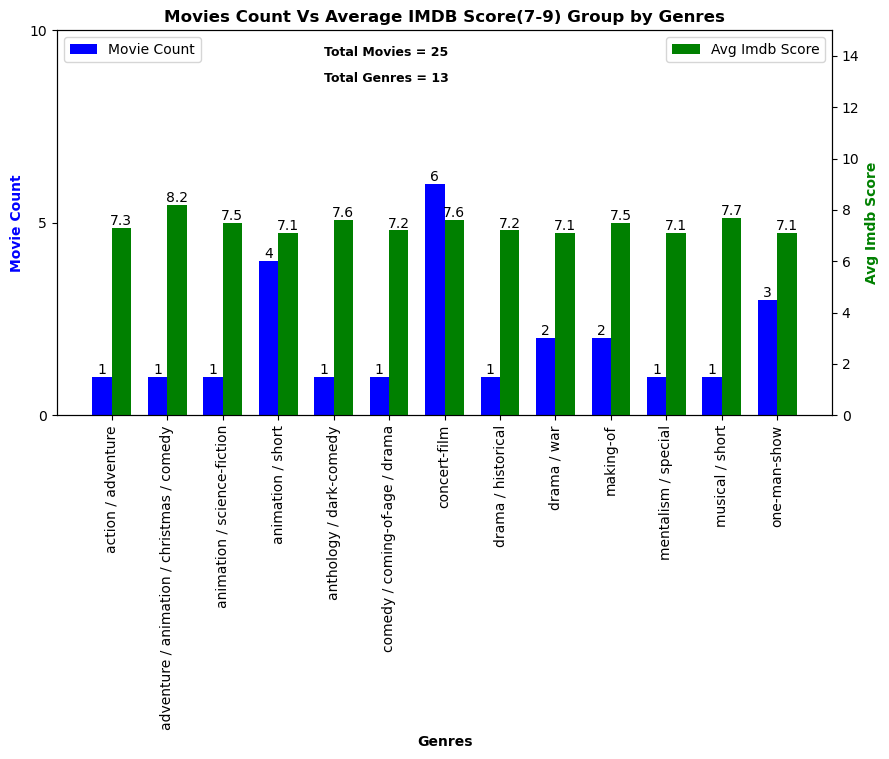

In [31]:
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_min','min'),('_mean','mean')],'Runtime':[('_min','min')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df2=df1.query("I__mean > 7 and I__mean <= 9")
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bar_width = 0.35
x = np.arange(len(df2['Genre']))
bars1 = ax1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', color='blue')
bars2 = ax2.bar(x + bar_width, df2['I__mean'], bar_width, label='Avg Imdb Score', color='green')
ax1.set_ylabel('Movie Count', color='blue', fontweight='bold')
ax2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
ax1.set_xlabel('Genres', fontweight='bold')
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(df2['Genre'])
ax1.set_title('Movies Count Vs Average IMDB Score(7-9) Group by Genres',fontweight='bold')
ax1.tick_params(axis='x', rotation=90)
ax1.set_yticks([0,5,10])
ax2.set_ylim(0,15) 
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.text(4, 14, f'Total Movies = {df2["G__cnt"].sum()}',fontweight='bold',fontsize=9)
plt.text(4, 13, f'Total Genres = {df2["Genre"].count()}',fontweight='bold',fontsize=9)
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1}', (bar1.get_x() + bar1.get_width() / 2, height1),
                 ha='center', va='bottom', fontsize=10)
    ax2.annotate(f'{height2:.1f}', (bar2.get_x() + bar2.get_width() / 2, height2),
                 ha='center', va='bottom', fontsize=10)
plt.show()

15.The 13 Genres, only 1-4  movies released, but scores between 7 - 9 IMDB scores,which is quite high..

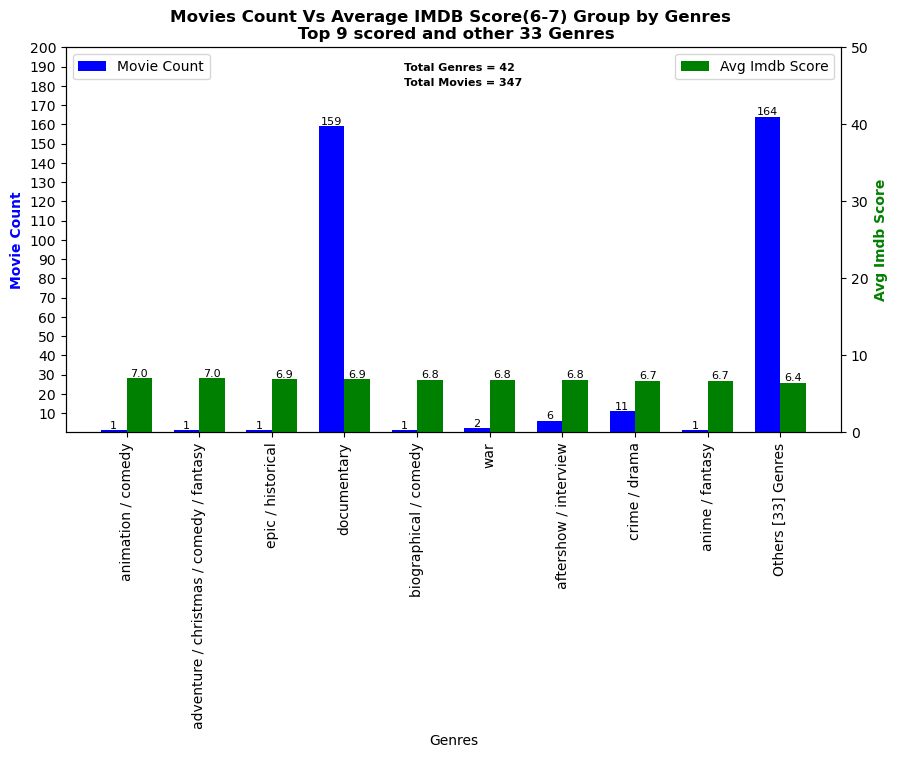

In [32]:
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_mean','mean')],'Runtime':[('_mean','mean')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df1['R__mean']= df1['R__mean'].apply(lambda x: round(x, 1))
df1=df1.query("I__mean > 6 and I__mean <= 7")
df1 = df1.sort_values(by='I__mean', ascending=False)
df2=df1[:9]
df3=df1[9:]
gen_cnt=df3['G__cnt'].sum()
Avg_rating=(df3['I__mean'].sum()/df3['Genre'].count()).round(1)
avg_runtime=(df3['R__mean'].sum()/df3['Genre'].count()).round(1)
new_row = {'Genre' : 'Others [33] Genres','G__cnt' : gen_cnt, 'I__mean' : Avg_rating, 'R__mean': avg_runtime}
df2.loc['01'] = new_row
df2
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
bar_width = 0.35
x = np.arange(len(df2['Genre']))
ax2 = ax1.twinx()
bars1=ax1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', align='center',color="blue")
x = x + bar_width
bars2=ax2.bar(x, df2['I__mean'], bar_width, label='Avg Imdb Score', align='center',color="green")
ax1.set_ylabel('Movie Count', color='blue', fontweight='bold')
ax2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
ax1.set_title("Movies Count Vs Average IMDB Score(6-7) Group by Genres \n Top 9 scored and other 33 Genres",fontweight='bold')
ax1.set_xlabel("Genres")
ax1.set_xticks(x - bar_width / 2)
ax1.set_xticklabels(df2['Genre'])
ax1.tick_params(axis='x', rotation=90)
ax1.set_yticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,160,170,180,190,200])
ax2.set_ylim(0,50) 
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.text(4,45,f'Total Movies = {df1["G__cnt"].sum()}',fontweight = 'bold',fontsize=8)
plt.text(4,47,f'Total Genres = {df1["Genre"].count()}',fontweight = 'bold',fontsize=8)
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1}', (bar1.get_x() + bar1.get_width() / 2, height1),
                ha='center', va='bottom', fontsize=8)
    ax2.annotate(f'{height2}', (bar2.get_x() + bar2.get_width() / 2, height2),
                ha='center', va='bottom', fontsize=8)
plt.show()

15.1) 42 Genres lie between 6-7 Imdb score. And their Movie counts are 347.

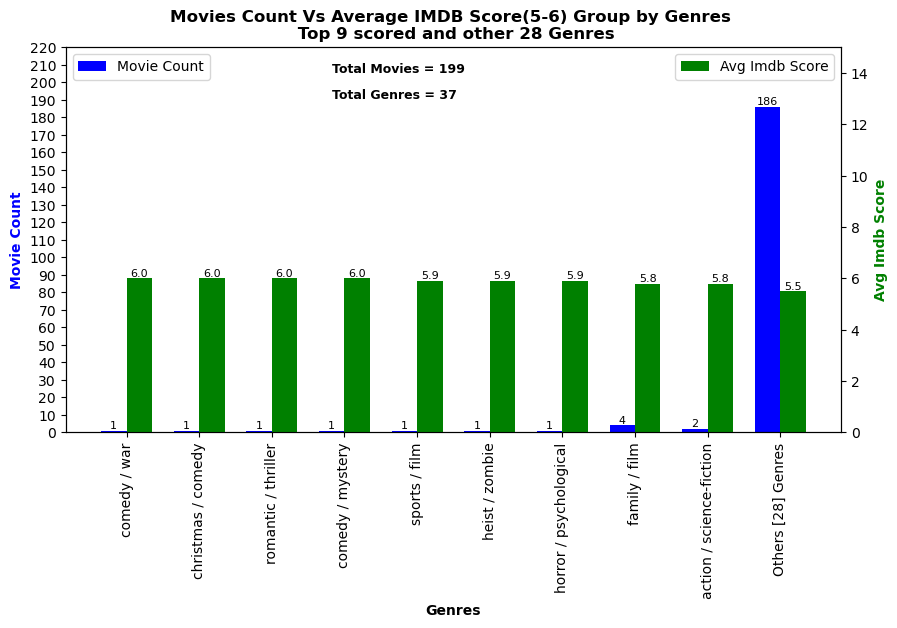

In [33]:
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_mean','mean')],'Runtime':[('_mean','mean')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df1['R__mean']= df1['R__mean'].apply(lambda x: round(x, 1))
df1=df1.query("I__mean > 5 and I__mean <= 6")
df1 = df1.sort_values(by='I__mean', ascending=False)
df2=df1[:9]
df3=df1[9:]
gen_cnt=df3['G__cnt'].sum()
Avg_rating=(df3['I__mean'].sum()/df3['Genre'].count()).round(1)
avg_runtime=(df3['R__mean'].sum()/df3['Genre'].count()).round(1)
new_row = {'Genre' : 'Others [28] Genres','G__cnt' : gen_cnt, 'I__mean' : Avg_rating, 'R__mean': avg_runtime}
df2.loc['01'] = new_row
fig, axes1 = plt.subplots(1, 1, figsize=(10, 5))
bar_width = 0.35
x = np.arange(len(df2['Genre']))
axes2=axes1.twinx()
bars1=axes1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', align='center',color='blue')
x = x + bar_width
bars2=axes2.bar(x, df2['I__mean'], bar_width, label='Avg Imdb Score', align='center',color='green')
axes1.set_title("Movies Count Vs Average IMDB Score(5-6) Group by Genres \n Top 9 scored and other 28 Genres",fontweight = 'bold')
axes1.set_xlabel("Genres",fontweight = 'bold')
axes1.set_ylabel('Movie Count', color='blue', fontweight='bold')
axes2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
axes1.set_xticks(x - bar_width / 2)
axes1.set_xticklabels(df2['Genre'])
axes1.tick_params(axis='x', rotation=90)
axes1.set_yticks([0,10,20,30,40, 50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220])
axes2.set_ylim(0,15)
axes1.legend(loc=2)
axes2.legend(loc=1)
plt.text(3,14,f'Total Movies = {df1["G__cnt"].sum()}',fontweight = 'bold',fontsize=9)
plt.text(3,13,f'Total Genres = {df1["Genre"].count()}',fontweight = 'bold',fontsize=9)
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    axes1.annotate(f'{height1}', (bar1.get_x() + bar1.get_width() / 2, height1),
                ha='center', va='bottom', fontsize=8)
    axes2.annotate(f'{height2}', (bar2.get_x() + bar2.get_width() / 2, height2),
                ha='center', va='bottom', fontsize=8)
plt.show()

15.2) Mostly, the above genres are having movie count from 1 - 4 per genre and scored 5-6 AvgImdbScore.

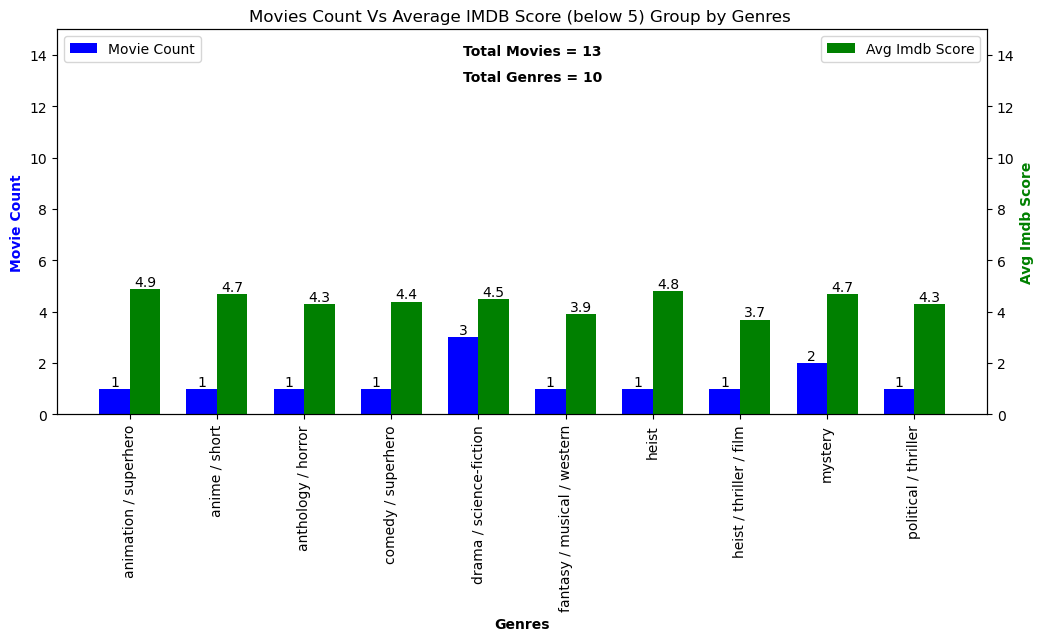

In [34]:

df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_min','min'),('_mean','mean')],'Runtime':[('_min','min')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df2=df1.query("I__mean <= 5")
fig, axes1 = plt.subplots(1, 1, figsize=(12, 5))
bar_width = 0.35
x = np.arange(len(df2['Genre']))
axes2=axes1.twinx()
bars1=axes1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', align='center',color="blue")
x = x + bar_width
bars2=axes2.bar(x, df2['I__mean'], bar_width, label='Avg Imdb Score', align='center',color="green")
axes1.set_title("Movies Count Vs Average IMDB Score (below 5) Group by Genres ")
axes1.set_xlabel("Genres",fontweight='bold')
axes1.set_ylabel('Movie Count', color='blue', fontweight='bold')
axes2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
axes1.set_xticks(x - bar_width / 2)
axes1.set_xticklabels(df2['Genre'])
axes1.tick_params(axis='x', rotation=90)
axes1.set_ylim(0,15)
axes2.set_ylim(0,15)
axes1.legend(loc=2)
axes2.legend(loc=1)
plt.text(4,14,f'Total Movies = {df2["G__cnt"].sum()}',fontweight = 'bold')
plt.text(4,13,f'Total Genres = {df2["Genre"].count()}',fontweight = 'bold')
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    axes1.annotate(f'{height1}', (bar1.get_x() + bar1.get_width() / 2, height1),
                ha='center', va='bottom', fontsize=10)
    axes2.annotate(f'{height2}', (bar2.get_x() + bar2.get_width() / 2, height2),
                ha='center', va='bottom', fontsize=10)
plt.show()

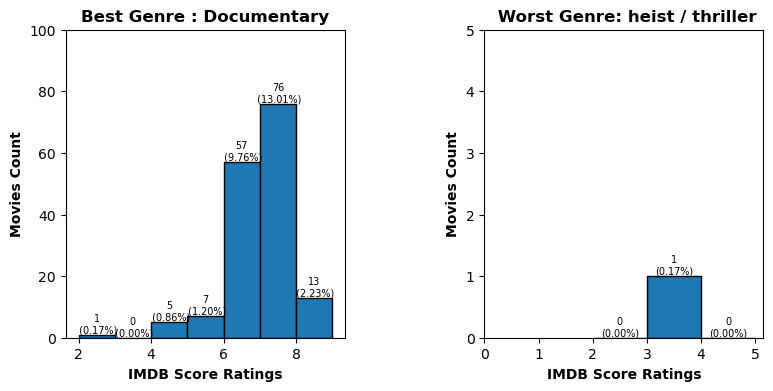

In [35]:
fig, axarr = plt.subplots(1, 2, figsize=(9, 4))
tot=len(data1['IMDB_Score'])
df1=data1.query('(Genre=="documentary") ')
df2=data1.query('(Genre=="heist / thriller / film")')
bulk_bins = [2,3,4,5,6,7,8,9]
counts, bins,_ =axarr[0].hist(df1['IMDB_Score'], bins=bulk_bins, edgecolor='k')
axarr[0].set_xlabel('IMDB Score Ratings',fontweight = 'bold')
axarr[0].set_ylabel('Movies Count',fontweight = 'bold')
axarr[0].set_yticks([0,20,40,60,80,100],['0','20','40','60','80','100'])
axarr[0].set_title('Best Genre : Documentary',ha='center', fontweight = 'bold')
for bin_count, x in zip(counts, bins):
    percentage = f'{100 * bin_count / tot:.2f}%'
    axarr[0].annotate(f'{int(bin_count)}\n ({percentage})', (x + (bulk_bins[1] - bulk_bins[0]) / 2, bin_count), fontsize=7, ha='center', va='bottom')
bulk_bins1 = [2,3,4,5]
counts1, bins1,_ = axarr[1].hist(df2['IMDB_Score'], bins=bulk_bins1, edgecolor='k')
axarr[1].set_xlabel('IMDB Score Ratings' ,fontweight = 'bold')
axarr[1].set_ylabel('Movies Count',fontweight = 'bold')
axarr[1].set_xticks([0,1,2,3,4,5],['0','1','2','3','4','5'])
axarr[1].set_yticks([0,1,2,3,4,5],['0','1','2','3','4','5'])
axarr[1].set_title(' Worst Genre: heist / thriller' ,ha='center',fontweight = 'bold')
for bin_count, x in zip(counts1, bins1):
    percentage = f'{100 * bin_count / tot:.2f}%'
    axarr[1].annotate(f'{int(bin_count)}\n({percentage})', (x + (bulk_bins1[1] - bulk_bins1[0]) / 2, bin_count), fontsize=7, ha='center', va='bottom')
plt.subplots_adjust(wspace=0.5)
plt.show()

16. A striking 96% of documentary movies tend to receive IMDB scores ranging from 5 to 9, indicating a positive reception among the audience. 
    Out of these, 4% fall below 5 points. Within this spectrum, 42% earn scores between 6 and 7 points, while 48% achieve scores of 7 to 8 points. Only 8% attain ratings of 8 to 9 points, and a mere 2% fall within the 5 to 6 point range. 
    
    These statistics strongly suggest that Documentary films receive broad acceptance from audiences.

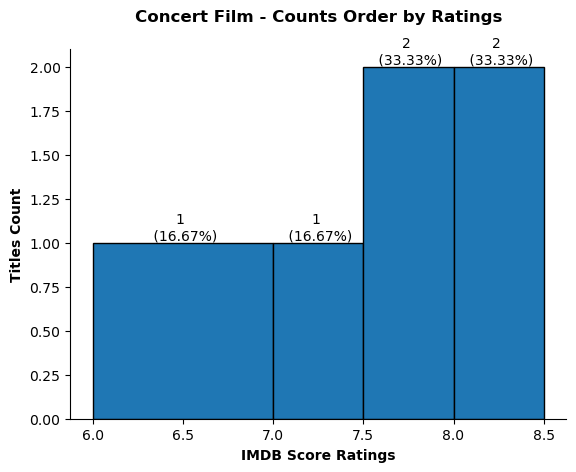

In [36]:
df2=data1.query('(Genre=="concert-film") ')
bulk_bins = [6,7,7.5,8,8.5]
hist, bin_edges = np.histogram(df2['IMDB_Score'], bins=bulk_bins)
plt.hist(df2['IMDB_Score'], bins=bulk_bins, edgecolor='k')
for i in range(len(hist)):
    percentage = (hist[i] / len(df2['IMDB_Score'])) * 100
    plt.text((bin_edges[i] + bin_edges[i+1]) / 2, hist[i], f"{hist[i]} \n ({percentage:.2f}%)", ha='center', va='bottom')
plt.xlabel('IMDB Score Ratings',fontweight = 'bold')
plt.ylabel('Titles Count',fontweight = 'bold')
plt.title('Concert Film - Counts Order by Ratings',fontweight = 'bold',pad=20)
sns.despine()
plt.show()

17. Concert Films also receives some significant scores.  Because, 3/6 scores 7.2 and above. 2/6 scores 8.2 -8.4. 
    Another 1/6 only has 6.4 points.
    We can say that all Concert Films have been received an overwhelming support among the people

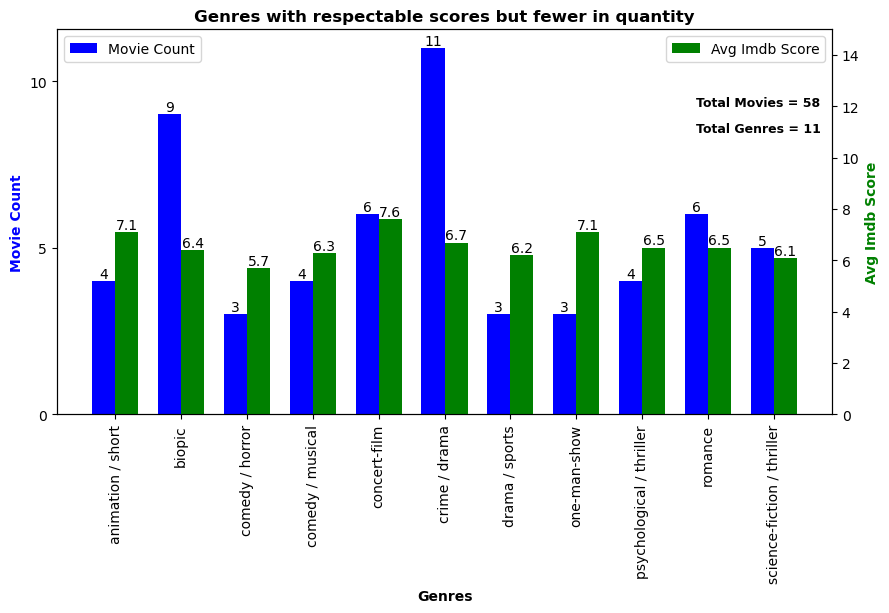

In [37]:
df1 = data1.groupby('Genre').agg({'Genre':[('_cnt','count')],'IMDB_Score': [('_min','min'),('_mean','mean')],'Runtime':[('_min','min')]})
df1.columns  =[f"{col[0]}_{agg}" for col, agg in df1.columns]
df1.reset_index(inplace=True)
df1['I__mean']= df1['I__mean'].apply(lambda x: round(x, 1))
df2=df1.loc[(df1['G__cnt'] >2) & (df1['I__min']>=5.5)]
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bar_width = 0.35
x = np.arange(len(df2['Genre']))
bars1 = ax1.bar(x, df2['G__cnt'], bar_width, label='Movie Count', color='blue')
bars2 = ax2.bar(x + bar_width, df2['I__mean'], bar_width, label='Avg Imdb Score', color='green')
ax1.set_ylabel('Movie Count', color='blue', fontweight='bold')
ax2.set_ylabel('Avg Imdb Score', color='green', fontweight='bold')
ax1.set_xlabel('Genres', fontweight='bold')
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(df2['Genre'])
ax1.set_title('Genres with respectable scores but fewer in quantity',fontweight='bold')
ax1.tick_params(axis='x', rotation=90)
ax1.set_yticks([0,5,10])
ax2.set_ylim(0,15) 
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.text(9, 12, f'Total Movies = {df2["G__cnt"].sum()}',fontweight='bold',fontsize=9)
plt.text(9, 11, f'Total Genres = {df2["Genre"].count()}',fontweight='bold',fontsize=9)
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax1.annotate(f'{height1}', (bar1.get_x() + bar1.get_width() / 2, height1),
                 ha='center', va='bottom', fontsize=10)
    ax2.annotate(f'{height2:.1f}', (bar2.get_x() + bar2.get_width() / 2, height2),
                 ha='center', va='bottom', fontsize=10)
plt.show()

18. While these genres have achieved decent ratings, their quantity remains limited. Nevertheless, they appear to have been 
enthusiastically embraced by the public.

## END